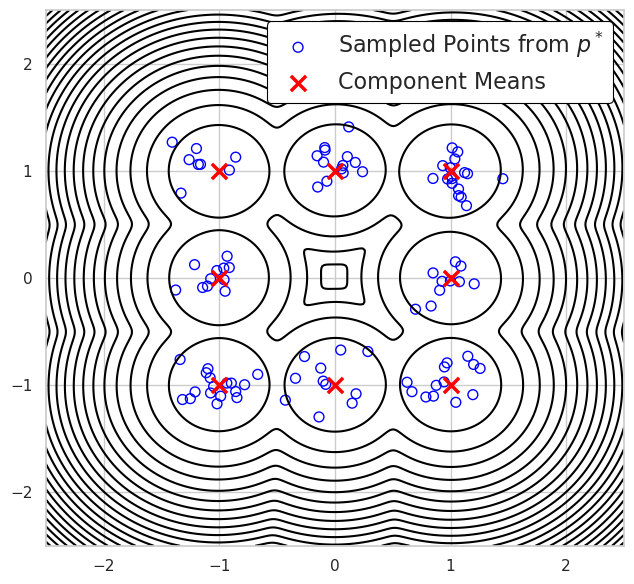

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Font size settings
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Style
sns.set(style="whitegrid")

# GMM parameters
np.random.seed(0)
n_features = 2
n_components = 8
means = np.array([[-1, 1], [0, 1], [1, 1], [-1, 0], [1, 0], [-1, -1], [0, -1], [1, -1]])
covariances = np.array([np.eye(n_features) * 0.025 for _ in range(n_components)])
weights = np.ones(n_components) / n_components

# Generate dataset
n_samples = 50_000
X = np.concatenate([
    np.random.multivariate_normal(mean, cov, int(weight * n_samples))
    for mean, cov, weight in zip(means, covariances, weights)
])

# Fit GMM
gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=100).fit(X)
X_sampled = gmm.sample(100)[0]

# Grid for contours
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.column_stack([X_grid.ravel(), Y_grid.ravel()])
Z = -gmm.score_samples(grid_points)
Z = Z.reshape(X_grid.shape)

# Plot
fig, ax = plt.subplots(figsize=(6.5, 6), facecolor='white')

# Contour lines
ax.contour(X_grid, Y_grid, Z, levels=25, colors='black', linewidths=1.5)

# Sampled data
ax.scatter(X_sampled[:, 0], X_sampled[:, 1], s=50, facecolors='none', edgecolors='blue', label=r'Sampled Points from $p^*$')

# GMM component means
ax.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=120, linewidths=2.5, label='Component Means')

# Axis labels with slightly larger font
# ax.set_xlabel("X-axis", fontsize=26)
# ax.set_ylabel("Y-axis", fontsize=26)

# Legend with opaque white background
legend = ax.legend(loc='upper right', frameon=True, fontsize=16)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)  # fully opaque
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.8)

# Final layout
plt.tight_layout()
plt.savefig("p_star_1.pdf", dpi=300, bbox_inches='tight')
plt.show()


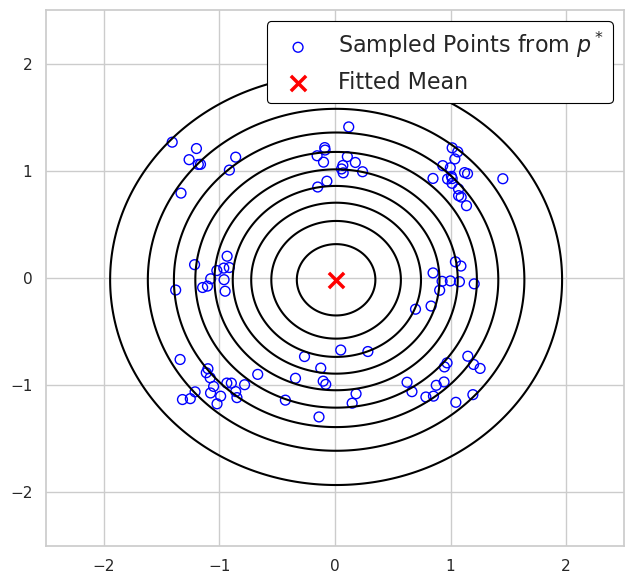

In [4]:
# Diagonal GMM fitting
gmm = GaussianMixture(n_components=1, covariance_type='diag').fit(X_sampled)
gmm_small_original = copy.copy(gmm)

# grid
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z = np.exp(gmm.score_samples(grid_points)).reshape(X_grid.shape)

fig, ax = plt.subplots(figsize=(6.5, 6), facecolor='white')

# Contour lines
ax.contour(X_grid, Y_grid, Z, levels=10, colors='black', linewidths=1.5)

# Sample points
ax.scatter(X_sampled[:, 0], X_sampled[:, 1], s=50, facecolors='none', edgecolors='blue', label='Sampled Points from $p^*$')

# Mean point
mean = gmm.means_[0]
ax.scatter(mean[0], mean[1], c='red', marker='x', s=120, linewidths=2.5, label='Fitted Mean')

# Legend with opaque white background
legend = ax.legend(loc='upper right', frameon=True, fontsize=16)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.8)

# Final layout
plt.tight_layout()
plt.savefig("p_student_direct_1.pdf", dpi=300, bbox_inches='tight')
plt.show()



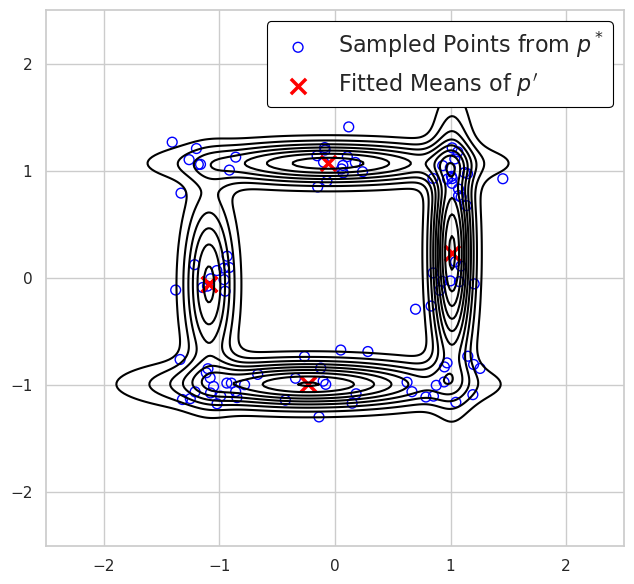

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# style
sns.set(style="whitegrid")

# Diagonal GMM with 4 components
gmm = GaussianMixture(n_components=4, covariance_type='diag').fit(X_sampled)

# Grid for contour
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z = np.exp(gmm.score_samples(grid_points)).reshape(X_grid.shape)

# Plot
fig, ax = plt.subplots(figsize=(6.5, 6), facecolor='white')

# Contour lines only (no density heatmap)
ax.contour(X_grid, Y_grid, Z, levels=10, colors='black', linewidths=1.5)

# Sample points
ax.scatter(X_sampled[:, 0], X_sampled[:, 1], s=50, facecolors='none', edgecolors='blue', label='Sampled Points from $p^*$')

# Component means
for mean in gmm.means_:
    ax.scatter(mean[0], mean[1], c='red', marker='x', s=120, linewidths=2.5)
# Add label once
ax.scatter(gmm.means_[0, 0], gmm.means_[0, 1], c='red', marker='x', s=120, linewidths=2.5, label=r"Fitted Means of $p'$")

# Legend with opaque background
legend = ax.legend(loc='upper right', frameon=True, fontsize=16)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.savefig("p_teacher_1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print('GMM weights:', gmm.weights_)

GMM weights: [0.15912176 0.2699429  0.24034452 0.33059081]


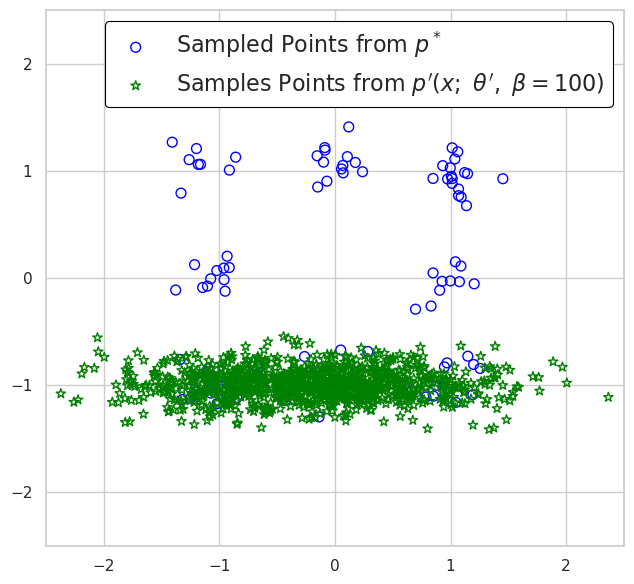

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# weight modification
original_weights = gmm.weights_.copy()
beta = 100.0
modified_weights = np.exp(np.log(original_weights) * beta)
modified_weights /= modified_weights.sum()
gmm.weights_ = modified_weights

# sampling
n_samples = 1000
X_samples_modi = gmm.sample(n_samples)[0]

# grid
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z = np.exp(gmm.score_samples(grid_points)).reshape(X_grid.shape)

fig, ax = plt.subplots(figsize=(6.5, 6), facecolor='white')

# Original samples (hollow)
ax.scatter(X_sampled[:, 0], X_sampled[:, 1], s=50, facecolors='none', edgecolors='blue', label='Sampled Points from $p^*$')

# Modified GMM samples (gold-filled)
ax.scatter(X_samples_modi[:, 0], X_samples_modi[:, 1], s=50, c='none', marker='*', edgecolors='green', label=r"Samples Points from $p'(x;\ \theta',\ \beta=100)$")

ax.set_ylim([-2.5,2.5])
ax.set_xlim([-2.5,2.5])

# Legend
legend = ax.legend(loc='upper right', frameon=True, fontsize=16)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.savefig("p_teacher_samples_b100_1.pdf", dpi=300, bbox_inches='tight')
plt.show()

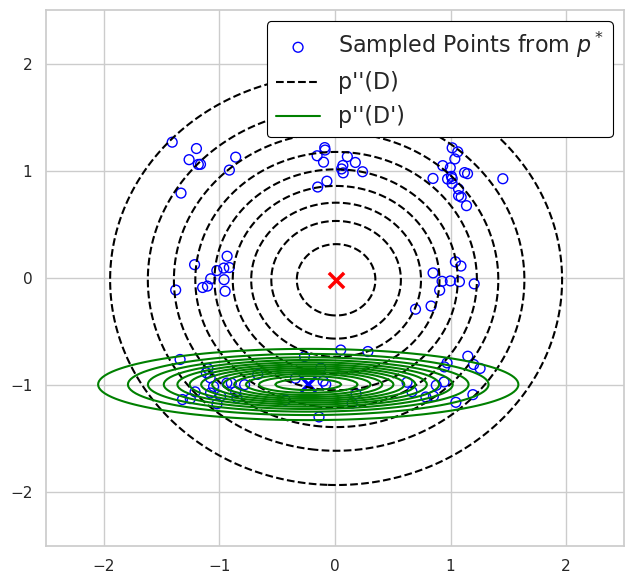

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import copy

# 스타일 세팅
sns.set(style="whitegrid")

# Distilled GMM from X_samples
gmm_small_distilled = GaussianMixture(n_components=1, covariance_type='diag', max_iter=1000).fit(X_samples_modi)
gmm_small_distilled = copy.copy(gmm_small_distilled)

# Grid
x = np.linspace(-2.5, 2.5, 300)
y = np.linspace(-2.5, 2.5, 300)
X_grid, Y_grid = np.meshgrid(x, y)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

Z_distilled = np.exp(gmm_small_distilled.score_samples(grid_points)).reshape(X_grid.shape)
Z_original = np.exp(gmm_small_original.score_samples(grid_points)).reshape(X_grid.shape)

# Plot
fig, ax = plt.subplots(figsize=(6.5, 6), facecolor='white')

# # Sample points (from modified GMM)
ax.scatter(X_sampled[:, 0], X_sampled[:, 1], s=50, facecolors='none', edgecolors='blue', label='Sampled Points from $p^*$')

# Contours
ax.contour(X_grid, Y_grid, Z_original, levels=10, colors='black', linewidths=1.5, linestyles='--')
ax.contour(X_grid, Y_grid, Z_distilled, levels=15, colors='green', linewidths=1.5)

# Means
ax.scatter(gmm_small_distilled.means_[:, 0], gmm_small_distilled.means_[:, 1], c='blue', marker='x', s=120, linewidths=2.5)
ax.scatter(gmm_small_original.means_[:, 0], gmm_small_original.means_[:, 1], c='red', marker='x', s=120, linewidths=2.5)

# Dummy legend entries for contours
ax.plot([], [], color='black', label=r"p''(D)", linestyle='--')
ax.plot([], [], color='green', label=r"p''(D')")

# Legend
legend = ax.legend(loc='upper right', frameon=True, fontsize=16, ncols=1)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(0.8)

plt.tight_layout()
plt.savefig("p_student_distillation_1.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# compute the average log-probability of `X_data` under the two models.
log_prob_data_small = gmm_small_original.score(X_sampled)
log_prob_data_small_distilled = gmm_small_distilled.score(X_sampled)

print('Average log-probability of X_data under the original model:', log_prob_data_small)
print('Average log-probability of X_data under the distilled model:', log_prob_data_small_distilled)

Average log-probability of X_data under the original model: -2.646337562663898
Average log-probability of X_data under the distilled model: -42.44545938327111


In [13]:
# produce samples from the original model and the distilled model.
# compute the average log-probability of the samples under `gmm_data`.
n_samples = 2000
X_samples = gmm_small_original.sample(n_samples)[0]
log_prob_samples_small = gmm.score(X_samples)

X_samples = gmm_small_distilled.sample(n_samples)[0]
log_prob_samples_small_distilled = gmm.score(X_samples)

print('Average log-probability of samples from the original model under the true distribution:', log_prob_samples_small)
print('Average log-probability of samples from the distilled model under the true distribution:', log_prob_samples_small_distilled)

Average log-probability of samples from the original model under the true distribution: -20.265652146373228
Average log-probability of samples from the distilled model under the true distribution: -0.7028965848116435
